In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from fractions import Fraction
import pickle
import os


In [2]:
# from matplotlib import style
# style.use('ggplot')

In [3]:
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


# Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')
mach = Symbol('M')
E51 = Symbol('E_51')
Rk = Symbol('R_k')
psi = Symbol('psi')
zet = Symbol('zeta')


## M31 results from model

In [4]:
#M31
# Radius
arcsec_r = np.array([  100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0, 5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0, 6500.0, 6600.0, 6700.0, 6800.0, 6900.0, 7000.0, 7100.0, 7200.0, 7300.0, 7400.0, 7500.0, 7600.0, 7700.0, 7800.0, 7900.0, 8000.0, 8100.0, 8200.0, 8300.0, 8400.0, 8500.0, 8600.0, 8700.0, 8800.0, 8900.0, 9000.0, 9100.0, 9200.0, 9300.0, 9400.0, 9500.0, 9600.0, 9700.0, 9800.0, 9900.0, 10000.0])

# sigma_los using model without warp (C. Carignan suggested I should use this model)
kms_sigma = np.array([17.10, 8.58, 12.94, 17.12, 12.99, 10.03, 13.13, 15.38, 16.60, 14.95, 15.63, 14.50, 12.63, 12.25, 12.57, 12.51, 13.53, 13.79, 13.93, 13.21, 11.56, 10.87, 10.81, 11.06, 11.77, 11.12, 12.21, 12.12, 12.12, 11.70, 11.41, 11.70, 12.54, 12.15, 11.65, 11.18, 11.21, 11.36, 11.72, 10.62, 10.23, 10.47, 10.62, 10.65, 9.76, 10.82, 11.45, 10.92, 10.91, 10.46, 10.01, 10.04, 9.86, 9.94, 10.17, 9.86, 9.55, 9.72, 9.79, 10.15, 9.82, 9.76, 9.86, 9.37, 9.73, 9.58, 9.66, 10.21, 10.21, 9.20, 8.95, 9.59, 10.20, 8.94, 9.01, 9.12, 9.29, 9.46, 9.80, 8.34, 9.01, 8.46, 8.98, 7.70, 7.99, 7.04, 6.43, 5.80, 8.92, 8.76, 6.95, 6.81, 6.60, 9.30, 13.69, 11.38, 6.81, 4.58, 9.05, 10.89])

# sigma_los using model WITH warp
kms_sigma_warp = np.array([12.05, 15.64, 15.70, 10.75, 8.71, 5.82, 6.08, 8.23, 9.48, 11.61, 13.61, 12.37, 7.77, 6.22, 5.98, 5.38, 5.47, 6.62, 8.16, 8.31, 8.67, 9.30, 9.67, 8.51, 7.51, 6.32, 6.13, 6.52, 9.29, 10.66, 11.48, 10.77, 10.61, 11.23, 12.05, 11.80, 11.42, 10.91, 8.56, 6.32, 5.45, 4.81, 5.43, 6.68, 10.43, 10.71, 10.95, 10.25, 9.16, 8.87, 9.05, 8.72, 8.98, 8.49, 9.61, 6.84, 6.16, 6.88, 9.87, 9.87, 9.85, 8.62, 7.97, 7.54, 7.19, 7.99, 8.30, 8.56, 7.14, 7.23, 7.85, 7.05, 7.49, 6.64, 8.34, 7.07, 5.53, 5.61, 4.06, 4.75, 8.15, 7.09, 5.89, 6.24, 5.59, 5.59, 4.49, 3.81, 2.61, 3.57, 4.67, 5.37, 6.67, 4.19, 5.09, 4.45, 4.40, 4.53, 5.62, 5.20])


In [5]:
#converted data
mpc_gal_dist = 0.78 #from Beck et al 
fac = mpc_gal_dist*np.pi/(180*(60*60))
mpc_radius = fac*arcsec_r
mpc = 1
kpc = 1e+3*mpc
kpcm = 3.086e+21
pcm = kpcm/1e+3
Msun = 1.989e+33
kpc_radius = kpc*mpc_radius
kms_dat_v = np.sqrt(3)*kms_sigma
kms_dat_v_warp = np.sqrt(3)*kms_sigma_warp


In [6]:
#data from Chamandy et al (2016)
kpc_dat_r = np.array([7, 9, 11, 13])
dat_omega = np.array([38.4, 31.1, 25.1, 21.1])*1e+5/kpcm
dat_q = np.array([0.75, 0.99, 1.07, 1.02])
dat_sigma1 = np.array([1.47, 2.17, 3.64, 4.05])
dat_sigma2 = np.zeros(4) #np.array([0.266, 0.308, 0.665, 0.51])
dat_sigma = (dat_sigma1 + dat_sigma2)*Msun/(pcm)**2
dat_sigmasfr = np.array([0.443, 0.621, 0.794, 0.227])*Msun/((10**9*365*24*60*60)*(pcm)**2)
dat_sigmatot = np.array([0.23, 0.168, 0.145, 0.105])*1e+3*Msun/(pcm)**2


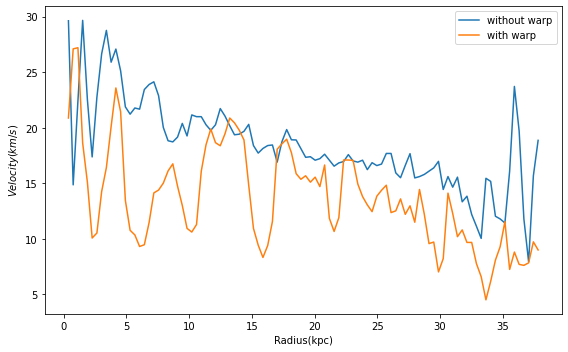

In [7]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8, 5), tight_layout=True)
ax.plot(kpc_radius, kms_dat_v, label = 'without warp')
ax.plot(kpc_radius, kms_dat_v_warp, label = 'with warp')
ax.set_xlabel('Radius(kpc)')
ax.set_ylabel('$Velocity(km/s)$')
ax.legend()
# ax.grid(b=True, which='major', color=[.6, .6, .6], linestyle='-')
# ax.grid(b=False, which='minor', color=[.6, .6, .6], linestyle=':')

In [8]:
kms = 1e+5
cs = (gamma*boltz*T/(mu*mh))**Rational(1/2)
cms_cs = cs.evalf(subs={gamma: 1.5, boltz: 1.38e-16, T:1e+4, mu:14/11, mh:1.67e-24})
print('Value of cs is {} and the max value of u is {}'.format(cms_cs,(kms_dat_v*kms).max()))

if np.sqrt(2)*cms_cs < (kms_dat_v*kms).max(): 
    print('$M>>\sqrt(2)$')
else : 
    print('$M<<\sqrt(2)$')


Value of cs is 986868.443212531 and the max value of u is 2965270.982557918
$M>>\sqrt(2)$


In [9]:
os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis' )

In [10]:
# quantities = [h, l, u, tau, biso, bani, Bbar, tanpb ]

model_no = 3
let = 'b'
os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis' )
from model_generator import  model_gen, bin_data
quantities = model_gen(model_no, let)
# script_dir = os.getcwd()  # <-- absolute dir the script is in
# model_name = "\model"+str(model_no)+let+".txt"
# rel_path = "model_scripts" + model_name
# abs_file_path = os.path.join(script_dir, rel_path)
# with open(abs_file_path, "rb") as inf:
#    quantities = pickle.load(inf)


ModuleNotFoundError: No module named 'model_generator'

1.48543689320388


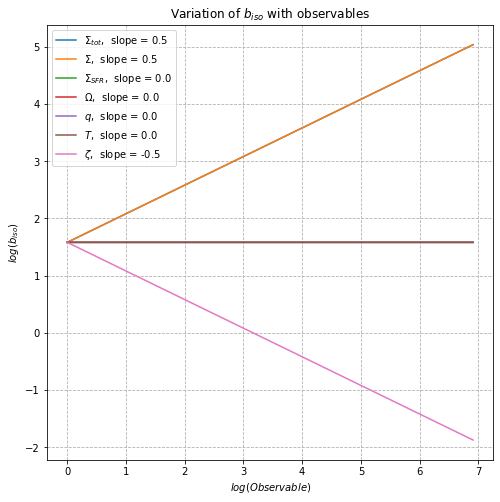

In [11]:
model_no = 3
let = 'b'
i = 4
s = r'b_{iso}'
import itertools
# for i, s in zip([4,5,6,7],[r'b_{iso}',r'b_{ani}',r'\bar{B}',r'tanp_{B}']):
#     for model_no, let in list(itertools.product([2,3],['a','b']))+[(3,'c'),(3,'d')]:
os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis\model_scripts' )
from model_generator import  model_gen, bin_data
quantities = model_gen(model_no, let)
os.chdir(r'C:\Users\WS7\Desktop\RionXX\MSc. Thesis\plots' )
const = [(gamma, 1), (boltz, 1), (mh, 1), (mu, 1), (mach, sqrt(2)), (G, 1), (cl, 5),
         (xio, 0.4), (kappa, 1), (calpha, 1), (Rk, 1), (mstar, 1), (delta, 1), (E51, 1)]
variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
            (omega, 1), (q, 1), (T, 1),(zet, 1)]
# quantity to be plotted
qu = quantities[i]
# observable to be varied
observ = [variables[i][0] for i in range(len(variables))]
var = np.linspace(1,1000,5000)
# plotting the scaling relations
plt.figure(figsize=(8,8))
for obs in observ:
    variables = [(sigmatot, 1), (sigma, 1), (sigmasfr, 1),
                (omega, 1), (q, 1), (T, 1),(zet, 1)]
    variables.remove((obs, 1))
    final = const + variables
    z = qu.subs(final)
    zf = [z.evalf(subs = {obs:i}) for i in var]
    zf = np.array(np.float64(zf))
    if i ==7 :zf =-zf
    po = str(np.round(np.float64(diff(log(z), obs)*obs), 2))
    plt.plot(np.log(var), np.log(zf), label = '$'+str(latex(obs))+'$,  slope = '+po)
plt.title('Variation of $'+s+'$ with observables')
plt.xlabel('$log(Observable)$')
plt.ylabel('$log('+s+')$')
plt.grid(True, which="both", ls="--")
plt.legend()
if i ==6: s = 'Bbar'
plt.savefig('scal'+s+str(model_no)+let+'.png')

In [14]:
qu

2.44948974278318*pi*xi_0**0.5*sqrt(\Sigma/(zeta*(E_51**(64/51)*Sigma_SFR*\delta*(T*gamma*k_B/(m_H*mu))**(1/3)/(m_**(\Sigma/m_H)**(76/51)))**(2/3)/(G*Sigma_tot))**(153/103))*(E_51**(64/51)*Sigma_SFR*\delta*(T*gamma*k_B/(m_H*mu))**(1/3)/(m_**(\Sigma/(m_H*(zeta*(E_51**(64/51)*Sigma_SFR*\delta*(T*gamma*k_B/(m_H*mu))**(1/3)/(m_**(\Sigma/m_H)**(76/51)))**(2/3)/(G*Sigma_tot))**(153/103)))**(76/51)*(zeta*(E_51**(64/51)*Sigma_SFR*\delta*(T*gamma*k_B/(m_H*mu))**(1/3)/(m_**(\Sigma/m_H)**(76/51)))**(2/3)/(G*Sigma_tot))**(153/103)))**(1/3)

In [138]:
# quantities = [h, l, u, tau, biso, bani, Bbar, tanpb,tanpbm, nu, n, cs]
vel = quantities[4]
vel

2.4494897427832*pi**1.0*xi_0**0.5*sqrt(\Sigma/(zeta*(E_51**(64/51)*Sigma_SFR*\delta*(T*gamma*k_B/(m_H*mu))**(1/3)/(m_**(\Sigma/m_H)**(76/51)))**(2/3)/(G*Sigma_tot))**1.48543689320388)*(E_51**(64/51)*Sigma_SFR*\delta*(T*gamma*k_B/(m_H*mu))**(1/3)/(m_**(\Sigma/(m_H*(zeta*(E_51**(64/51)*Sigma_SFR*\delta*(T*gamma*k_B/(m_H*mu))**(1/3)/(m_**(\Sigma/m_H)**(76/51)))**(2/3)/(G*Sigma_tot))**1.48543689320388))**(76/51)*(zeta*(E_51**(64/51)*Sigma_SFR*\delta*(T*gamma*k_B/(m_H*mu))**(1/3)/(m_**(\Sigma/m_H)**(76/51)))**(2/3)/(G*Sigma_tot))**1.48543689320388))**(1/3)

In [139]:

const = [(gamma, 1.5), (boltz, 1.3807e-16), (mh, 1.67e-24), (mu, 14/11), (mach, 1), (G, 6.67e-8),
         (cl, 3/4), (xio, 0.4), (calpha, 1), (Rk, 0.3), (mstar, 0.85*Msun), (delta, 8e-3), (E51, 1)]
variables = [(sigmatot, 1), (sigma, 1),
             (sigmasfr, 1), (omega, 1), (q, 1), (T, 1)]

# plotting the scaling relations
observ = [sigmatot, sigma, sigmasfr, q, omega, T]

for obs in observ:
    variables.remove((obs, 1))
final = const + variables

express = [quan.subs(final).simplify(force=True) for quan in quantities]

# nu_final = ((delta*sigmasfr)/(2*express[0]*mstar)).subs(final).simplify(force=True)
# rho = sigma/(2*express[0])
# n_final = (rho/((14/11)*mh)).subs(final).simplify(force=True)
# cs_final = cms_cs




In [140]:
express[4]

0.000400099987503126*pi**1.0*sqrt(\Sigma/(zeta*(Sigma_SFR*T**(1/3)/\Sigma**(76/51))**(2/3)/Sigma_tot)**1.48543689320388)*(Sigma_SFR*T**(1/3)/((\Sigma/(zeta*(Sigma_SFR*T**(1/3)/\Sigma**(76/51))**(2/3)/Sigma_tot)**1.48543689320388)**(76/51)*(zeta*(Sigma_SFR*T**(1/3)/\Sigma**(76/51))**(2/3)/Sigma_tot)**1.48543689320388))**(1/3)

In [14]:
psival = 1
zetaval = 5

In [15]:
opt_temp = 1e+4*np.ones(4) #np.array([52741.3432660786, 38111.9002993212, 43686.9637235394, 42422.4130791510])

In [16]:
scalreldata = []
for exp in express:
    scalreldata.append([exp.evalf(subs={ sigmatot:sigt, sigma: sig, sigmasfr: sigsfr, q:qs, omega: oms, zet:zetaval, T:t}) for sigt,sig, sigsfr,qs, oms, t in zip(dat_sigmatot, dat_sigma, dat_sigmasfr, dat_q, dat_omega, opt_temp)])
scalreldata = np.array(np.float64(scalreldata))
an_vel = scalreldata[2]/kms
an_vel

array([21.80483178, 14.23109207, 11.31672202, 12.43961177])

In [17]:
[scalreldata[0][i]/kpcm for i in range(4)]

[0.25510080360394116,
 0.1487652020486137,
 0.10899522580598793,
 0.1818689400829176]

In [18]:
final_vel = bin_data(kpc_radius, kms_dat_v, 6, 14, 2)

In [19]:
scalreldata[0]/pcm

array([255.1008036 , 148.76520205, 108.99522581, 181.86894008])

In [20]:
G_dat_Bord = np.array([4.9, 5.2, 4.9, 4.6])
G_dat_Breg = np.array([1.8, 2.1, 2.6, 2.7])
G_dat_Btot = np.array([7.3, 7.5, 7.1, 6.3])
M_dat_pb = np.array([13, 19, 11, 8])* np.pi/180
err_M_dat_pb = np.array([4, 4, 3, 3])* np.pi/180
mdat_tanpb = np.tan(M_dat_pb)
m_errdat_tanpb = 1/(np.cos(err_M_dat_pb))**2
mrange = np.arange(7.9,15.8, 2.2)

RM_dat_pb = np.array([4, 9, 7, 7])* np.pi/180
err_RM_dat_pb = np.array([5, 3, 3, 2])* np.pi/180
rmdat_tanpb = np.tan(RM_dat_pb)
rm_errdat_tanpb = 1/(np.cos(err_RM_dat_pb))**2
rmrange = np.arange(7.5,11, 1)

In [21]:
G_scal_Bbartot = np.sqrt(scalreldata[4]**2 + scalreldata[5]**2 + scalreldata[6]**2)
G_scal_Bbarreg = scalreldata[6]
G_scal_Bbarord = np.sqrt(scalreldata[5]**2 + scalreldata[6]**2)

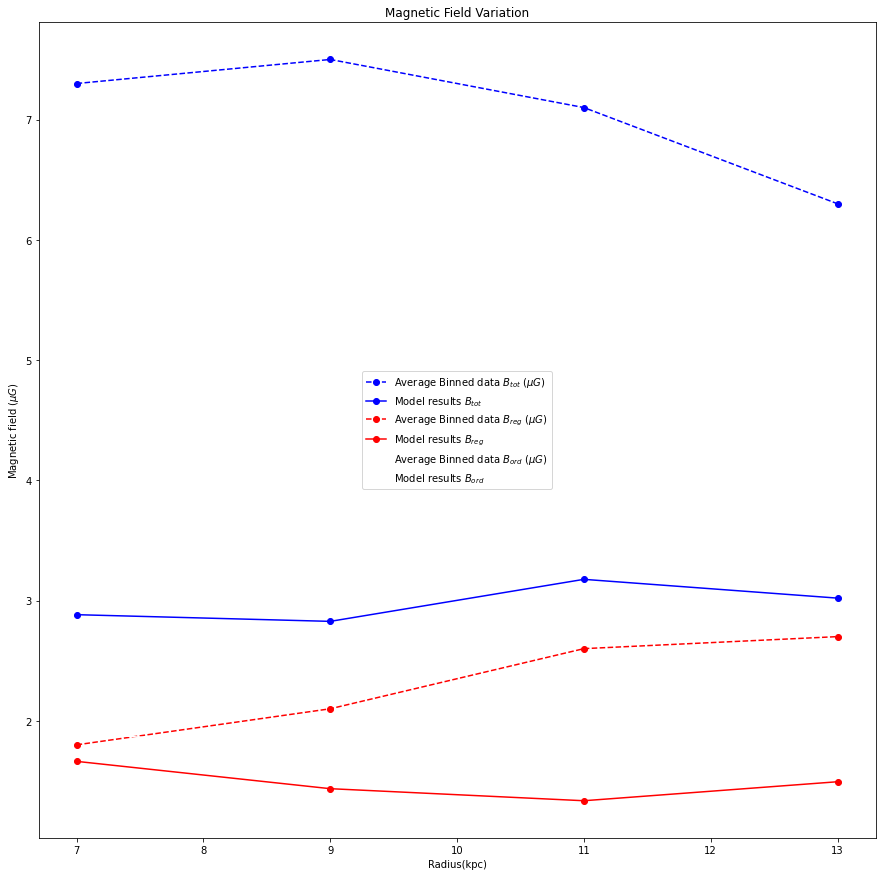

In [22]:
fig = plt.figure(figsize = (15,15))
plt.plot(kpc_dat_r, G_dat_Btot, c = 'b',linestyle='--', marker='o', label = 'Average Binned data $B_{tot}$ ($\mu G$)')
plt.plot(kpc_dat_r, G_scal_Bbartot*1e+6,c = 'b',linestyle='-', marker='o',label = r'Model results $B_{tot}$')

plt.plot(kpc_dat_r, G_dat_Breg, c = 'r',linestyle='--', marker='o', label = 'Average Binned data $B_{reg}$ ($\mu G$)')
plt.plot(kpc_dat_r, G_scal_Bbarreg*1e+6,c = 'r',linestyle='-', marker='o',label = r'Model results $B_{reg}$')

plt.plot(kpc_dat_r, G_dat_Bord, c = 'y',linestyle='--', marker='o', label = 'Average Binned data $B_{ord}$ ($\mu G$)')
plt.plot(kpc_dat_r, G_scal_Bbarord*1e+6,c = 'y',linestyle='-', marker='o',label = r'Model results $B_{ord}$')

plt.title('Magnetic Field Variation')
plt.xlabel('Radius(kpc)')
plt.ylabel('Magnetic field ($\mu G$)')
plt.legend()

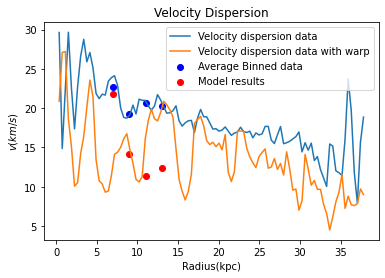

In [23]:
plt.plot(kpc_radius, kms_dat_v, label = 'Velocity dispersion data')
plt.plot(kpc_radius, kms_dat_v_warp, label = 'Velocity dispersion data with warp')
plt.scatter(kpc_dat_r, final_vel, c = 'b', label = 'Average Binned data')
plt.scatter(kpc_dat_r, an_vel,c = 'r', label = 'Model results')
plt.title('Velocity Dispersion')
plt.xlabel('Radius(kpc)')
plt.ylabel('$v(km/s)$')
plt.legend()

In [24]:
pB = np.arctan(-scalreldata[7])
pbb = np.arctan(scalreldata[8])
pbo = np.arctan((scalreldata[6]*np.sin(pB) + scalreldata[5]*np.sin(pbb))/(scalreldata[6]*np.cos(pB) + scalreldata[5]*np.cos(pbb)))

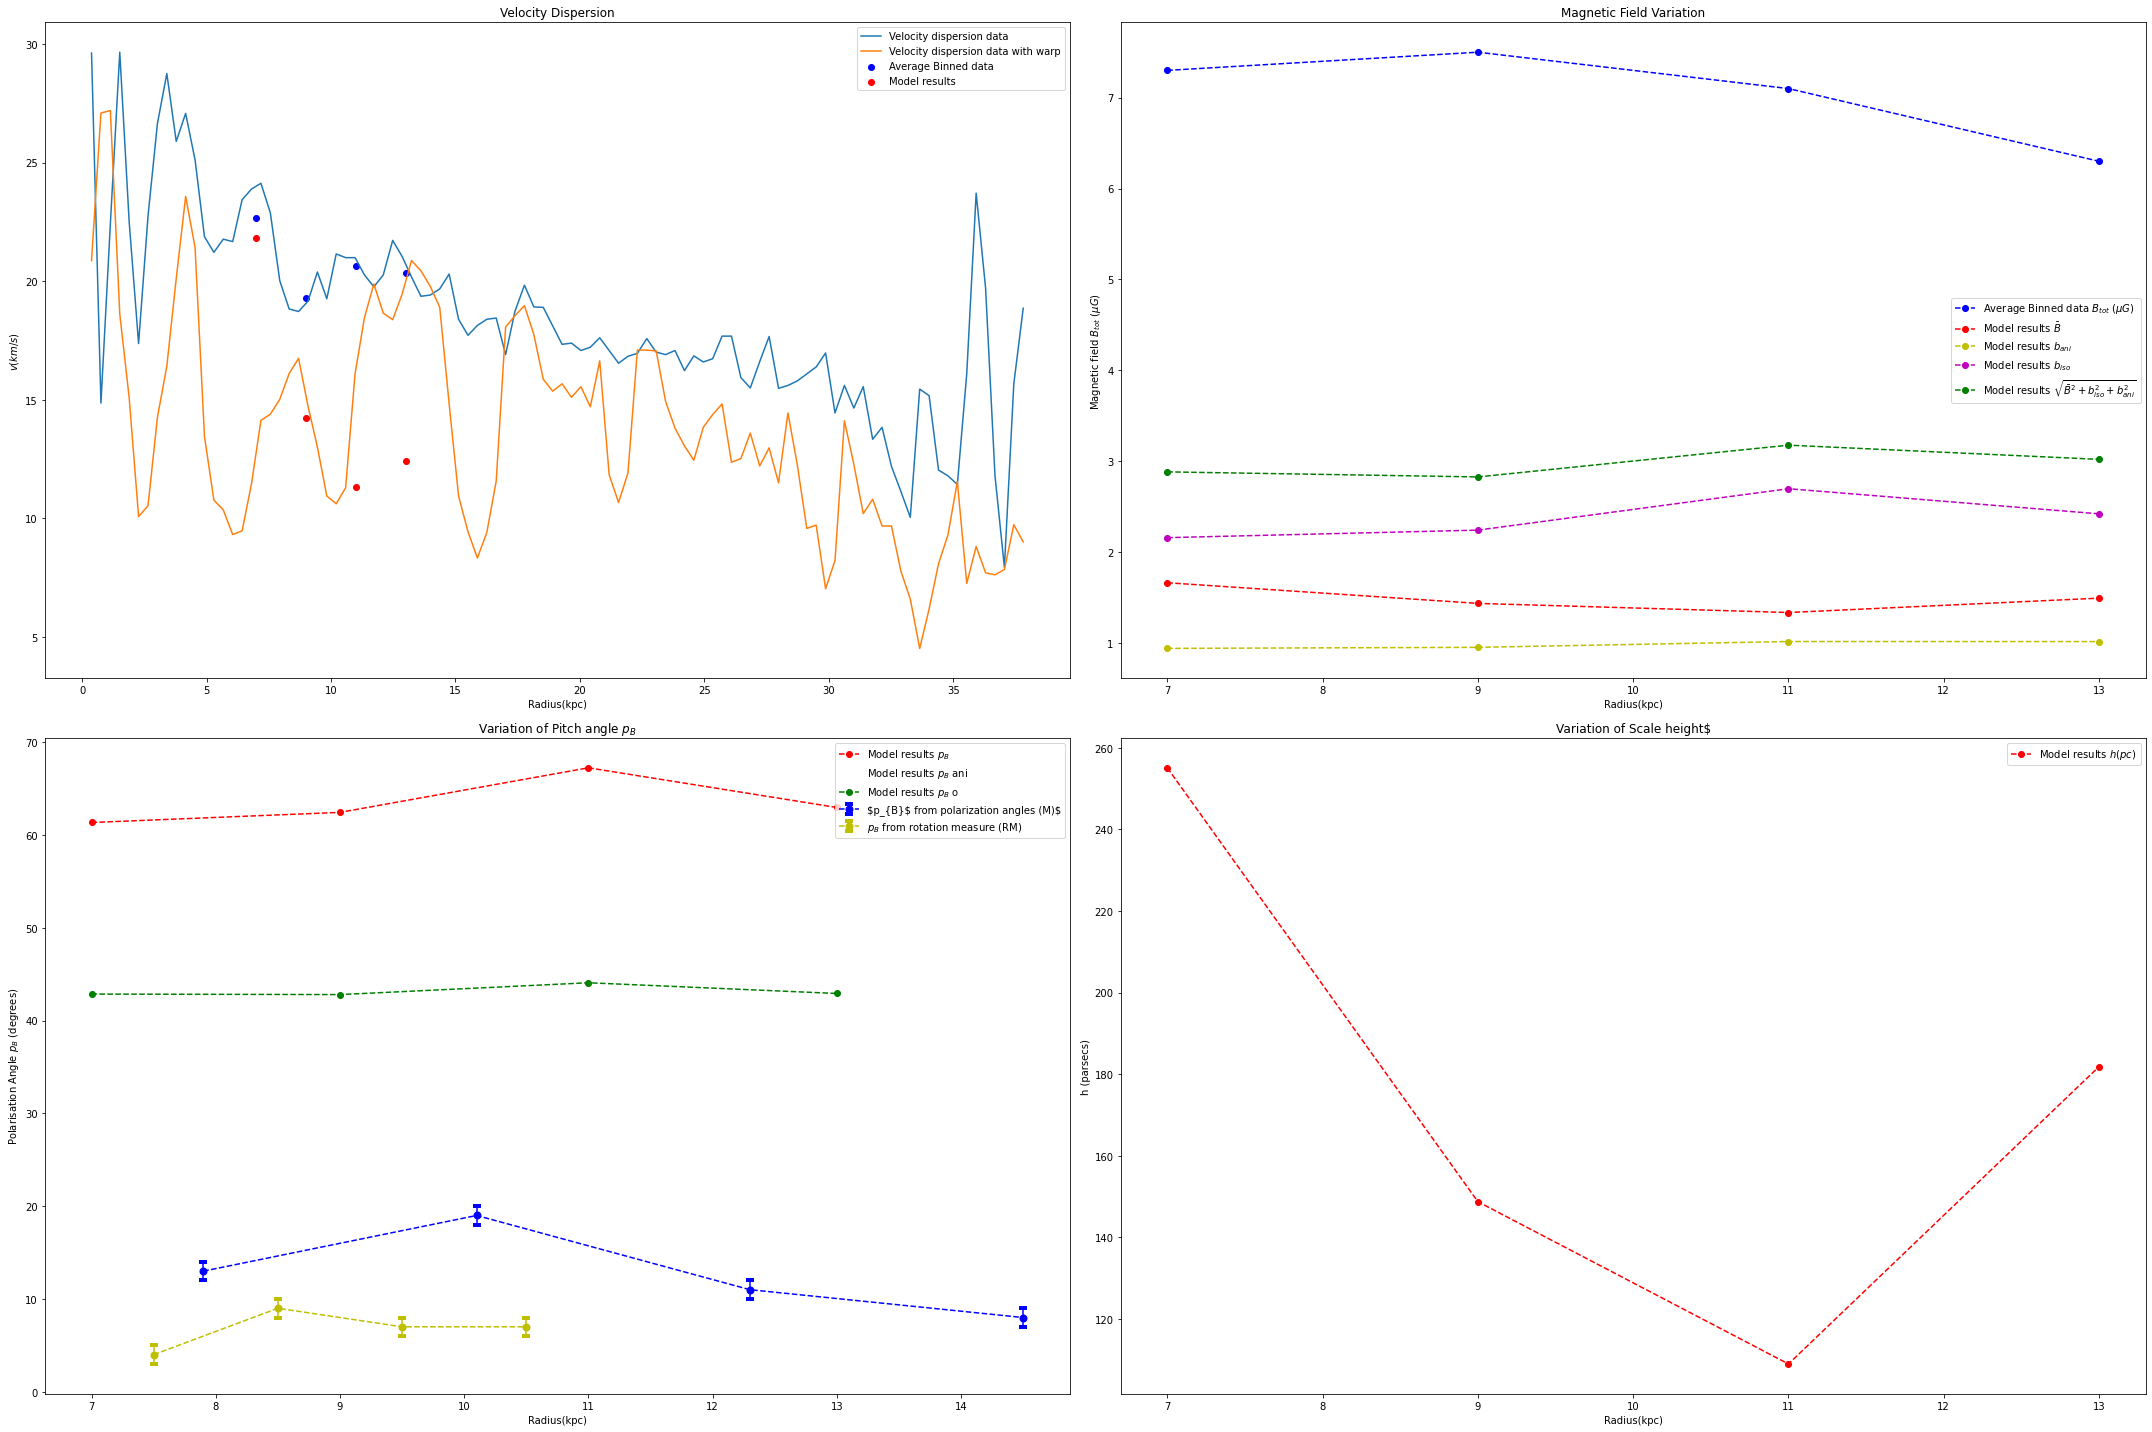

In [25]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(30, 20), tight_layout=True)
i = 0
j= 0
ax[i][j].plot(kpc_radius, kms_dat_v, label = 'Velocity dispersion data')
ax[i][j].plot(kpc_radius, kms_dat_v_warp, label = 'Velocity dispersion data with warp')
ax[i][j].scatter(kpc_dat_r, final_vel, c = 'b', label = 'Average Binned data')
ax[i][j].scatter(kpc_dat_r, an_vel,c = 'r', label = 'Model results')
ax[i][j].set_title('Velocity Dispersion')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel('$v(km/s)$')
ax[i][j].legend()

i = 0
j=1
ax[i][j].plot(kpc_dat_r, G_dat_Btot, c = 'b',linestyle='--', marker='o', label = 'Average Binned data $B_{tot}$ ($\mu G$)')
ax[i][j].plot(kpc_dat_r, scalreldata[6]*1e+6,c = 'r',linestyle='--', marker='o',label = r'Model results $\bar{B}$')
ax[i][j].plot(kpc_dat_r, scalreldata[5]*1e+6,c = 'y',linestyle='--', marker='o',label = r'Model results $b_{ani}$')
ax[i][j].plot(kpc_dat_r, scalreldata[4]*1e+6,c = 'm',linestyle='--', marker='o',label = r'Model results $b_{iso}$')
ax[i][j].plot(kpc_dat_r, G_scal_Bbartot*1e+6,c = 'g',linestyle='--', marker='o', label = r'Model results $\sqrt{\bar{B}^2+b_{iso}^2+b_{ani}^2}$')
ax[i][j].set_title('Magnetic Field Variation')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel('Magnetic field $B_{tot}$ ($\mu G$)')
ax[i][j].legend()

i = 1
j=0
ax[i][j].errorbar(mrange, 180*M_dat_pb/np.pi, yerr = m_errdat_tanpb, ms=4, mew=4, capsize=4, c = 'b',linestyle='--', marker='o', label = r'$p_{B}$ from polarization angles (M)$')
ax[i][j].errorbar(rmrange, 180*RM_dat_pb/np.pi, yerr = rm_errdat_tanpb, ms=4, mew=4, capsize=4,c = 'y',linestyle='--', marker='o', label = r'$p_{B}$ from rotation measure (RM)')
ax[i][j].plot(kpc_dat_r, 180*np.arctan(-scalreldata[7])/np.pi,c = 'r',linestyle='--', marker='o',label = r'Model results $p_{B}$')
ax[i][j].plot(kpc_dat_r, 180*np.arctan(scalreldata[8])/np.pi,c = 'w',linestyle='--', marker='o',label = r'Model results $p_{B}$ ani')
ax[i][j].plot(kpc_dat_r, 180*np.arctan(pbo)/np.pi,c = 'g',linestyle='--', marker='o',label = r'Model results $p_{B}$ o')

ax[i][j].set_title('Variation of Pitch angle $p_{B}$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel('Polarisation Angle $p_{B}$ (degrees)')
ax[i][j].legend()

i = 1
j=1
ax[i][j].plot(kpc_dat_r, scalreldata[0]/pcm,c = 'r',linestyle='--', marker='o',label = r'Model results $h(pc)$')
ax[i][j].set_title('Variation of Scale height$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel('h (parsecs)')
ax[i][j].legend()
plt.savefig('Model'+str(model_no)+let)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


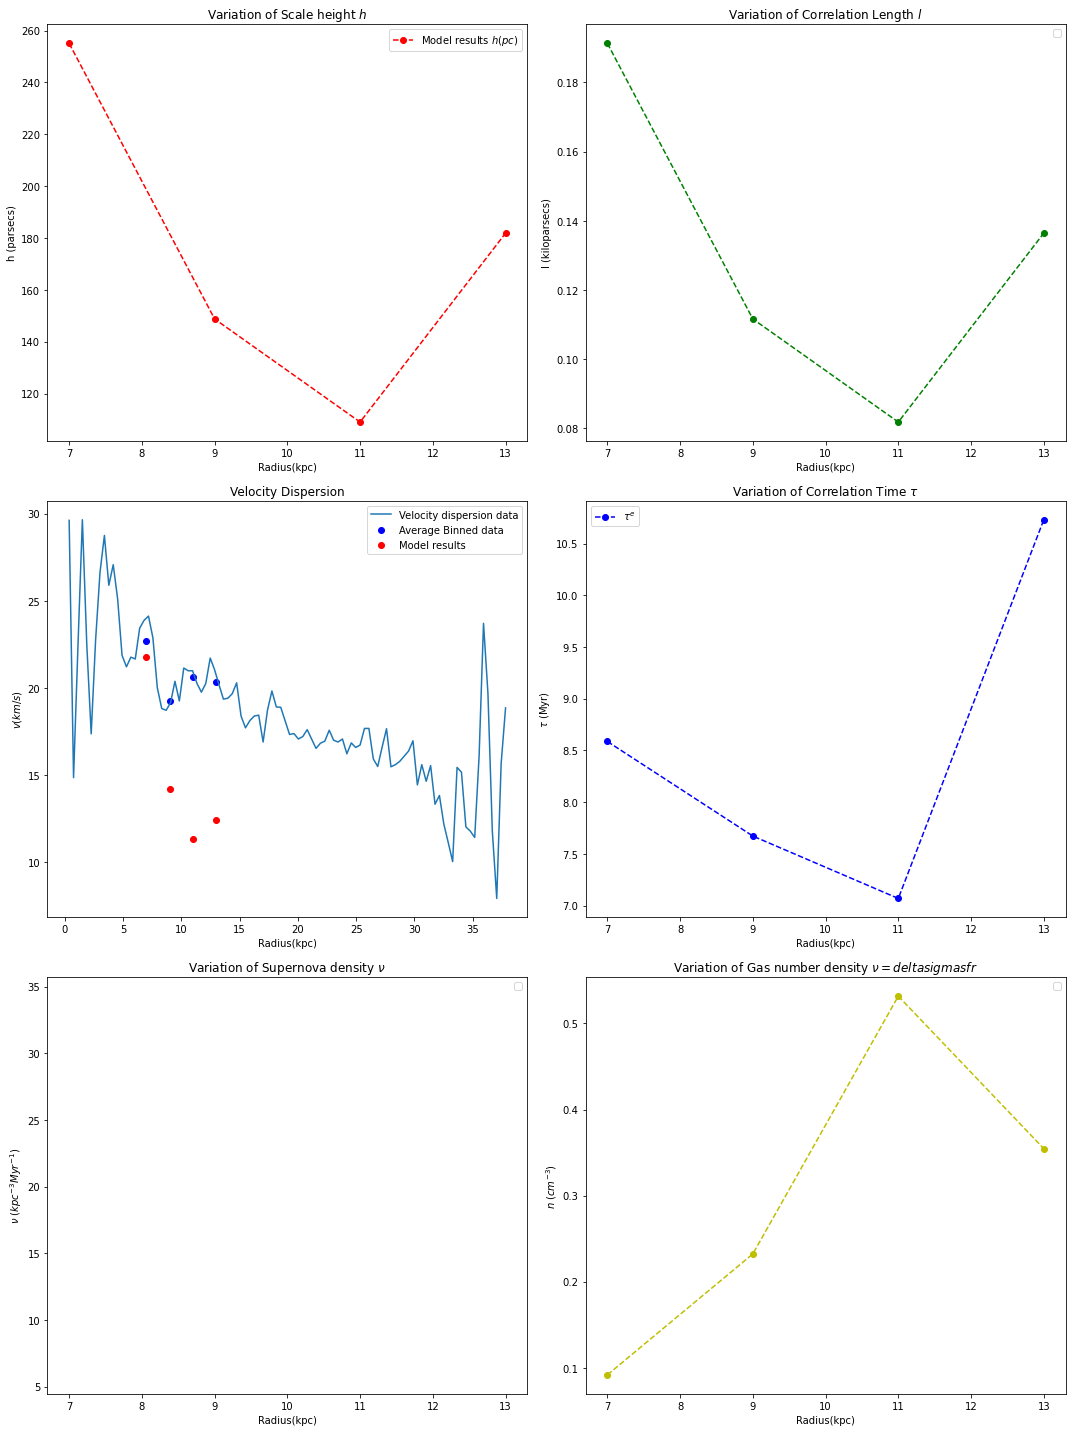

In [26]:
fig, ax = plt.subplots(nrows=3,ncols=2, figsize=(15, 20), tight_layout=True)
i = 0
j= 0
ax[i][j].plot(kpc_dat_r, scalreldata[0]/pcm,c = 'r',linestyle='--', marker='o',label = r'Model results $h(pc)$')
ax[i][j].set_title('Variation of Scale height $h$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel('h (parsecs)')
ax[i][j].legend()

i = 0
j= 1
ax[i][j].plot(kpc_dat_r, scalreldata[1]/kpcm,c = 'g',linestyle='--', marker='o')
ax[i][j].set_title('Variation of Correlation Length $l$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel('l (kiloparsecs)')
ax[i][j].legend()

i = 1
j=0
ax[i][j].plot(kpc_radius, kms_dat_v, label = 'Velocity dispersion data')
#ax[i][j].plot(kpc_radius, kms_dat_v_warp, label = 'Velocity dispersion data with warp')
ax[i][j].scatter(kpc_dat_r, final_vel, c = 'b', label = 'Average Binned data')
ax[i][j].scatter(kpc_dat_r, an_vel,c = 'r', label = 'Model results')
ax[i][j].set_title('Velocity Dispersion')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel('$v(km/s)$')
ax[i][j].legend()

i = 1
j= 1
ax[i][j].plot(kpc_dat_r, scalreldata[3]/(1e+6*365*24*60*60),c = 'b',linestyle='--', marker='o', label = r'$\tau^e$')
#ax[i][j].plot(kpc_dat_r, qb/(1e+6*365*24*60*60),c = 'g',linestyle='--', marker='o', label = r'$\tau^r$')
ax[i][j].set_title(r'Variation of Correlation Time $\tau$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'$\tau$ (Myr)')
ax[i][j].legend()

i = 2
j= 0
ax[i][j].plot(kpc_dat_r, scalreldata[-3]*(kpcm)**3*(1e+6*365*24*60*60),c = 'w',linestyle='--', marker='o')
ax[i][j].set_title(r'Variation of Supernova density $\nu$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'$\nu$ $(kpc^{-3}Myr^{-1})$')
ax[i][j].legend()

i = 2
j= 1
ax[i][j].plot(kpc_dat_r, scalreldata[-2],c = 'y',linestyle='--', marker='o')
ax[i][j].set_title(r'Variation of Gas number density $\nu = delta sigmasfr$')
ax[i][j].set_xlabel('Radius(kpc)')
ax[i][j].set_ylabel(r'$n$ ($cm^{-3}$)')
ax[i][j].legend()

plt.savefig('Model'+str(model_no)+let+'hlut')

In [27]:
scalreldata[-2]

array([0.09174253, 0.23223281, 0.53169075, 0.3545371 ])

In [28]:
express[0]

203076447317.508*2**(1/3)*3**(2/3)*pi**(1/3)*Sigma_tot/(zeta*(Sigma_SFR*T)**(2/3))

In [29]:
express[2]

142.54051548285*2**(2/3)*3**(1/3)*pi**(2/3)*(Sigma_tot**3/(Sigma_SFR*T*zeta**3))**(1/3)

TypeError: Cannot convert expression to float

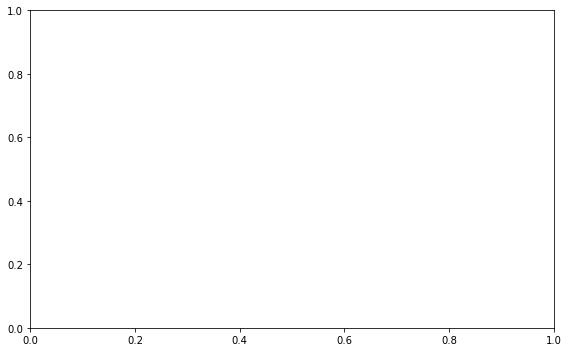

In [30]:
x = []
y = []
#*Msun/(pcm)**2
for i in np.linspace(1,10000,num =500):
    b = {sigma: i ,sigmasfr: i*1e-17}
    x.append(express[0].evalf(subs = b))
    y.append(express[1].evalf(subs = b))
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8, 5), tight_layout=True)
ax.plot(np.array(x)/kpcm, np.array(y)/kms, label = 'Velocity dispersion data')
ax.set_xlabel('H (kpc)')
ax.set_ylabel('$v(km/s)$')
ax.legend()

In [ ]:
# from scipy.interpolate import interp1d
# fn = interp1d(kpc_radius, kms_dat_v ,kind = 'slinear', bounds_error= False, fill_value='extrapolate')